In [1]:
# compart macs2 peaks with OCRs of HmmrATAC

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import subprocess as sp
import pybedtools as pbt
import importlib
pbt.set_bedtools_path('/home/rabbani/localenv/anaconda/miniconda3/envs/matplotlib/bin/')
pbt = importlib.reload(pbt)
root = os.path.join("/data/manke/group/rabbani/atac_project2078/")

In [3]:
# For each sample look for the ovelapped peaks and the peak length distribution

In [4]:
root = os.path.join("/data/manke/group/rabbani/atac_project2078/")
ratio_dict = dict()
length_dict = {'hmmr':[], 'macs':[]}
def find_interect(hmmr, macs):
    a = pbt.BedTool.from_dataframe(hmmr)
    a = a.sort()
    b = pbt.BedTool.from_dataframe(macs)
    b = b.sort()
    a_overlap_b = a.intersect(b, u=True).to_dataframe(disable_auto_names=True, header=None)
    ratio = (len(a_overlap_b)/len(a.to_dataframe(disable_auto_names=True, header=None)))*100
    return ratio

def get_length(df):
    df['len'] = df[2] - df[1]
    return df['len'].values
    
for cond in ['WT', 'K197Q', 'K197R', 'Vector']:
    for treatment in ['LPS0', 'LPS3', 'LPS12']:
        for rep in ['rep1', 'rep2', 'rep3']:
            name = '_'.join([cond, treatment, rep])
            hmmr = os.path.join(root, "hmmratac","ocrs", '-'.join([cond, treatment, rep])+".filtered_peaks.bed")
            macs = os.path.join(root, "atac_pipeline","MACS2", '_'.join([cond, treatment, rep])+".filtered_peaks.narrowPeak")
            hmmr = pd.read_csv(hmmr, sep = "\t", header = None, usecols = [0,1,2])
            length_dict['hmmr'].append(get_length(hmmr))
            macs = pd.read_csv(macs, sep = "\t", header = None, usecols = [0,1,2])
            length_dict['macs'].append(get_length(macs))
            ratio_dict[name] = find_interect(hmmr,macs)


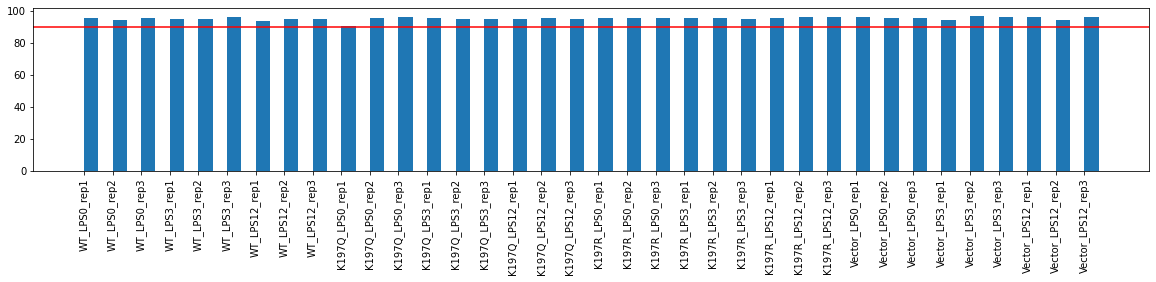

In [5]:
# How much of hmmratac peaks are overlapped with at least one macs2 peak
labels = []
samples = []
for k, v in ratio_dict.items():
    labels.append(k)
    samples.append(v)

plt.figure(figsize=(20, 3))
plt.xticks(range(len(labels)), labels, rotation = 90)


plt.bar(np.arange(0, len(samples)),np.array(samples), align='edge', width=0.5)
plt.axhline(y=90, color='r', linestyle='-')
plt.show()

In [6]:
# How much of macs2 peaks are unique to macs2?
root = os.path.join("/data/manke/group/rabbani/atac_project2078/")
macs_ratio_dict = dict()
def find_uniq(macs,hmmr):
    a = pbt.BedTool.from_dataframe(macs)
    a = a.sort()
    b = pbt.BedTool.from_dataframe(hmmr)
    b = b.sort()
    a_notoverlap_b = a.intersect(b, v=True).to_dataframe(disable_auto_names=True, header=None)
    ratio = (len(a_notoverlap_b)/len(a.to_dataframe(disable_auto_names=True, header=None)))*100
    return ratio

def get_length(df):
    df['len'] = df[2] - df[1]
    return df['len'].values
    
for cond in ['WT', 'K197Q', 'K197R', 'Vector']:
    for treatment in ['LPS0', 'LPS3', 'LPS12']:
        for rep in ['rep1', 'rep2', 'rep3']:
            name = '_'.join([cond, treatment, rep])
            hmmr = os.path.join(root, "hmmratac","ocrs", '-'.join([cond, treatment, rep])+".filtered_peaks.bed")
            macs = os.path.join(root, "atac_pipeline","MACS2", '_'.join([cond, treatment, rep])+".filtered_peaks.narrowPeak")
            hmmr = pd.read_csv(hmmr, sep = "\t", header = None, usecols = [0,1,2])
            macs = pd.read_csv(macs, sep = "\t", header = None, usecols = [0,1,2])
            macs_ratio_dict[name] = find_uniq(macs,hmmr)
print(macs_ratio_dict)

{'WT_LPS0_rep1': 33.64821392044926, 'WT_LPS0_rep2': 38.609751635182725, 'WT_LPS0_rep3': 33.29584552481343, 'WT_LPS3_rep1': 34.72964525707142, 'WT_LPS3_rep2': 32.69917502614354, 'WT_LPS3_rep3': 31.898727722393616, 'WT_LPS12_rep1': 38.804166249682446, 'WT_LPS12_rep2': 31.75660142532125, 'WT_LPS12_rep3': 32.7209424719647, 'K197Q_LPS0_rep1': 41.2972824320608, 'K197Q_LPS0_rep2': 33.86706623184574, 'K197Q_LPS0_rep3': 36.587145394326306, 'K197Q_LPS3_rep1': 34.6841526827748, 'K197Q_LPS3_rep2': 32.23548882846672, 'K197Q_LPS3_rep3': 32.08667305848514, 'K197Q_LPS12_rep1': 33.835559776947115, 'K197Q_LPS12_rep2': 40.032897661598646, 'K197Q_LPS12_rep3': 35.038948318871185, 'K197R_LPS0_rep1': 34.965872477530944, 'K197R_LPS0_rep2': 33.357332535437784, 'K197R_LPS0_rep3': 33.70855849959797, 'K197R_LPS3_rep1': 31.857135979201107, 'K197R_LPS3_rep2': 31.38973464977466, 'K197R_LPS3_rep3': 33.929128130520624, 'K197R_LPS12_rep1': 32.778662797116766, 'K197R_LPS12_rep2': 35.0268178874479, 'K197R_LPS12_rep3': 33

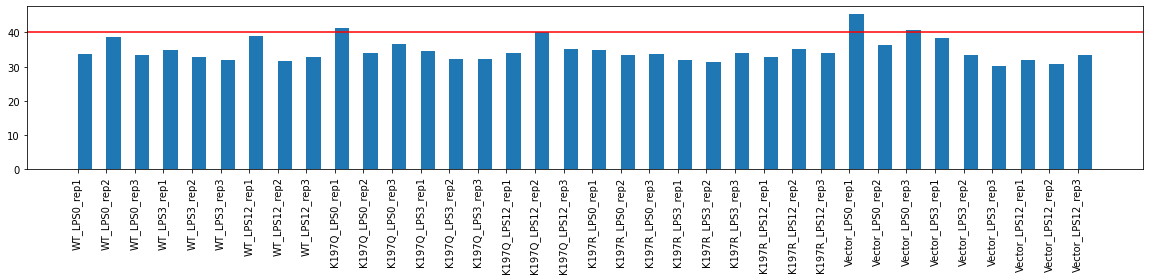

In [7]:
# How much of macs2 peaks are unique to macs2?
labels = []
samples = []
for k, v in macs_ratio_dict.items():
    labels.append(k)
    samples.append(v)

plt.figure(figsize=(20, 3))
plt.xticks(range(len(labels)), labels, rotation = 90)


plt.bar(np.arange(0, len(samples)),np.array(samples), align='edge', width=0.5)
plt.axhline(y=40, color='r', linestyle='-')
plt.show()

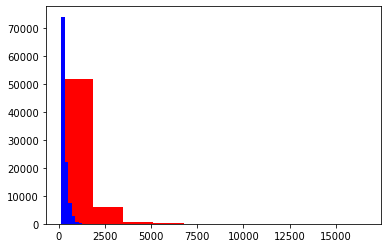

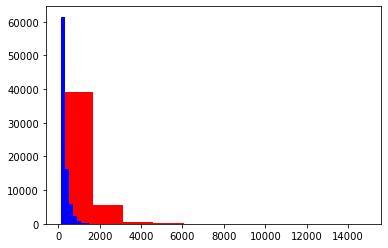

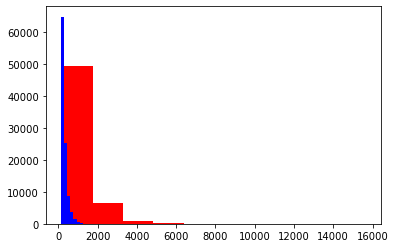

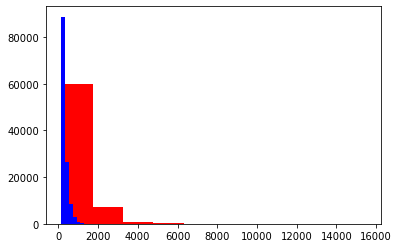

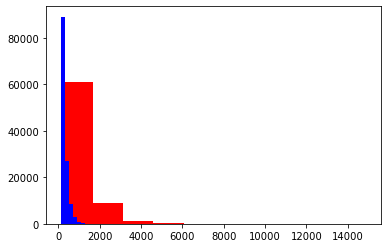

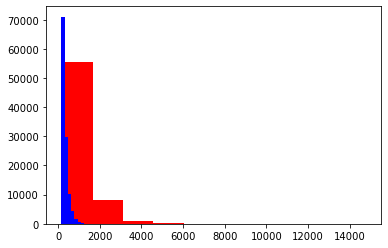

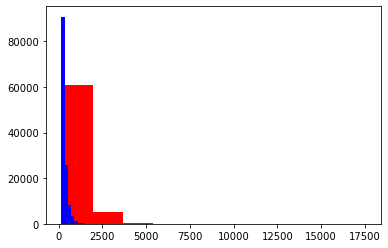

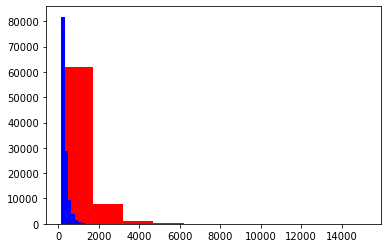

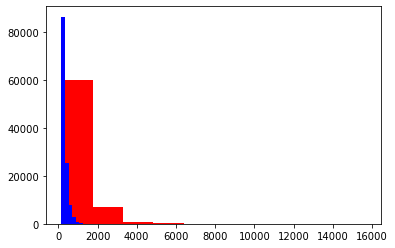

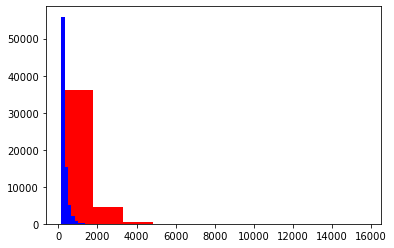

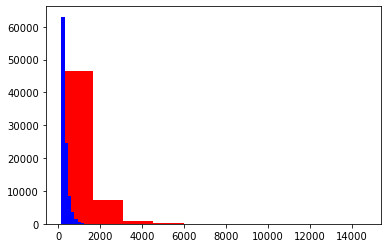

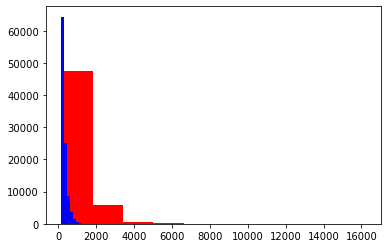

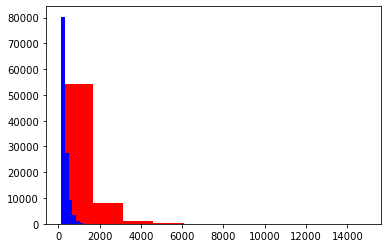

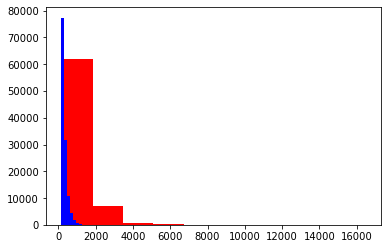

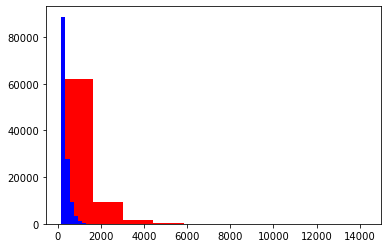

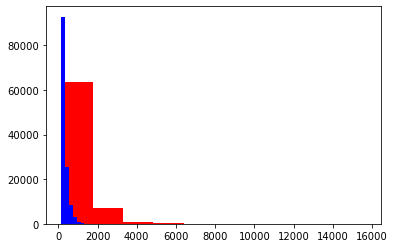

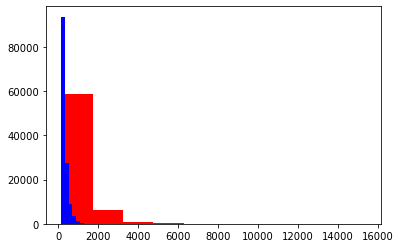

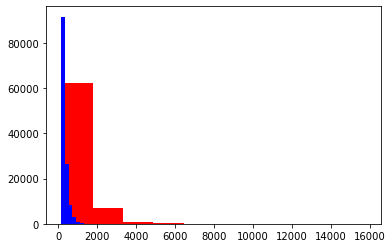

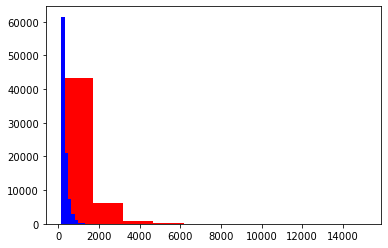

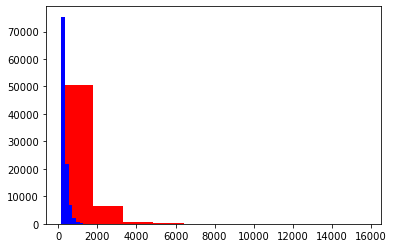

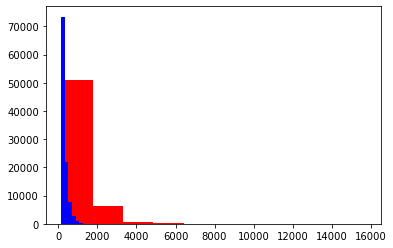

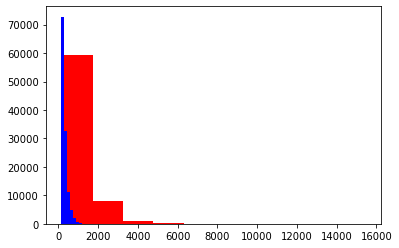

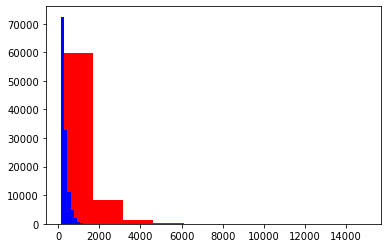

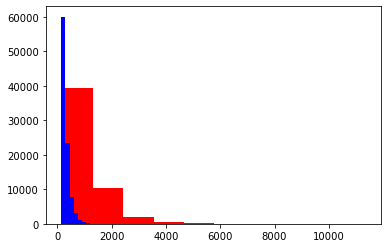

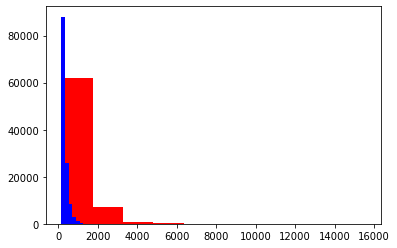

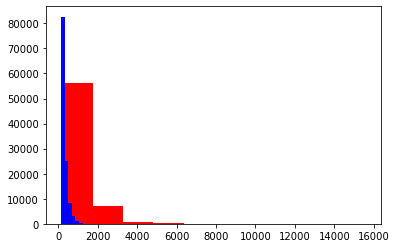

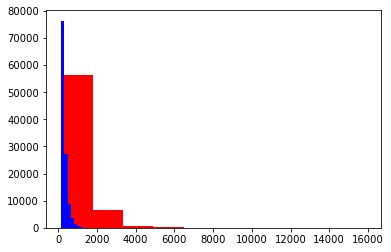

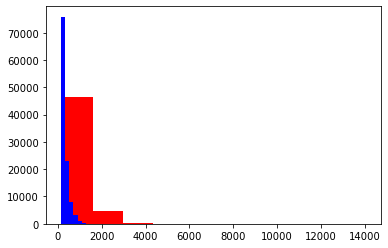

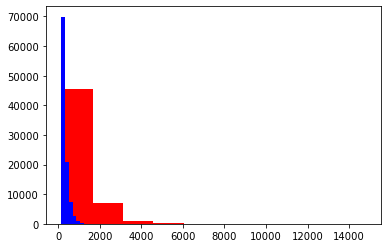

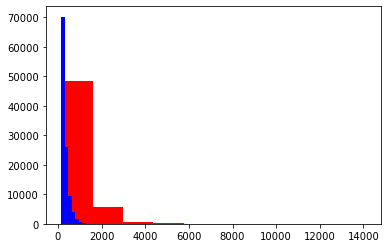

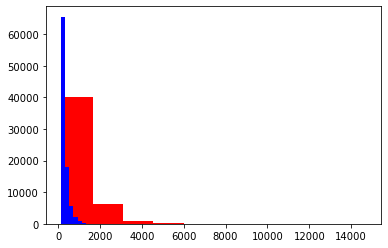

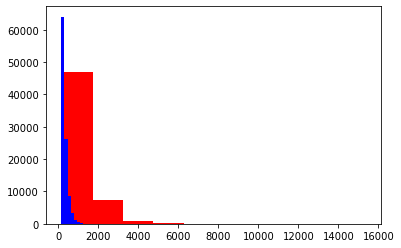

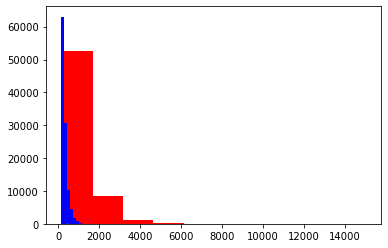

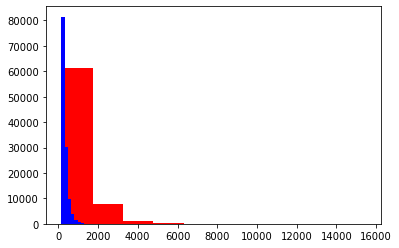

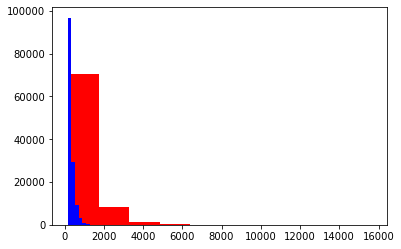

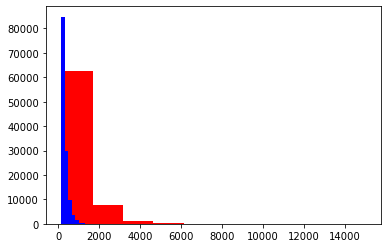

In [8]:
for i in np.arange(0,36):
    plt.hist(length_dict['hmmr'][i], color= 'r')
    plt.hist(length_dict['macs'][i], color= 'b')
    plt.show()        

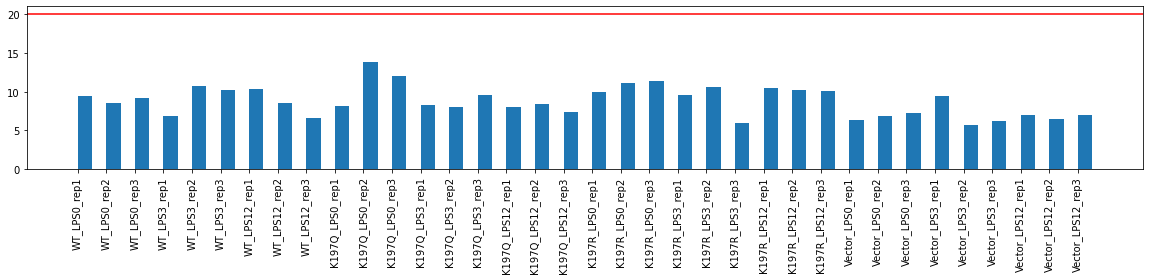

In [9]:
# are hiCov regions among the macs2 called peaks
root = os.path.join("/data/manke/group/rabbani/atac_project2078/")
hicovRatioDict = dict()
for cond in ['WT', 'K197Q', 'K197R', 'Vector']:
    for treatment in ['LPS0', 'LPS3', 'LPS12']:
        for rep in ['rep1', 'rep2', 'rep3']:
            name = '_'.join([cond, treatment, rep])
            hmmr = os.path.join(root, "hmmratac","hiCov", '-'.join([cond, treatment, rep])+".filtered_peaks.bed")
            macs = os.path.join(root, "atac_pipeline","MACS2", '_'.join([cond, treatment, rep])+".filtered_peaks.narrowPeak")
            hmmr = pd.read_csv(hmmr, sep = ",", header = None, usecols = [0,1,2])
            macs = pd.read_csv(macs, sep = "\t", header = None, usecols = [0,1,2])
            hicovRatioDict[name] = find_interect(hmmr,macs)
labels = []
samples = []
for k, v in hicovRatioDict.items():
    labels.append(k)
    samples.append(v)

plt.figure(figsize=(20, 3))
plt.xticks(range(len(labels)), labels, rotation = 90)


plt.bar(np.arange(0, len(samples)),np.array(samples), align='edge', width=0.5)
plt.axhline(y=20, color='r', linestyle='-')
plt.show()

In [10]:
# correlation plot on macs2 - hiCov
concat = pd.DataFrame()
for cond in ['WT', 'K197Q', 'K197R', 'Vector']:
    for treatment in ['LPS0', 'LPS3', 'LPS12']:
        for rep in ['rep1', 'rep2', 'rep3']:
            name = '_'.join([cond, treatment, rep])
            hmmr = os.path.join(root, "hmmratac","hiCov", '-'.join([cond, treatment, rep])+".filtered_peaks.bed")
            macs = os.path.join(root, "atac_pipeline","MACS2", '_'.join([cond, treatment, rep])+".filtered_peaks.narrowPeak")
            hmmr = pd.read_csv(hmmr, sep = ",", header = None, usecols = [0,1,2])
            macs = pd.read_csv(macs, sep = "\t", header = None, usecols = [0,1,2])
            a = pbt.BedTool.from_dataframe(hmmr)
            a = a.sort()
            b = pbt.BedTool.from_dataframe(macs)
            b = b.sort()
            b_nonoverlap_a = b.intersect(a, v=True).to_dataframe(disable_auto_names=True, header=None)
            if len(concat) == 0:
                concat = b_nonoverlap_a
            else:
                concat = pd.concat([concat, b_nonoverlap_a])
concat.to_csv(os.path.join(root, "macs2_wo_hiCov.bed"), sep = "\t", index = None, header = False)

In [11]:
# matrix with all macs2 peaks - hiCov
cmd = "module load deeptools/3.5.0 slurm/19.05.3-2; SlurmEasy -t 10 -n 'bamSumMacs' '"
cmd += "multiBamSummary BED-file --BED "+os.path.join(root, "macs2_wo_hiCov.bed") 
cmd += " -b "+" ".join(glob.glob(os.path.join(root, "hmmratac", "filteredbams_sorted", "*.bam"))) # bams are on all filtered alignments 
cmd += " -bl /data/repository/organisms/GRCm38_ensembl/akundaje/blacklist.bed -p 20 "
cmd += " -o "+os.path.join(root, "multibamsummary_counts_on_macs2_wo_hiCov.npz")+"'"
print(cmd)
sp.check_output(cmd, shell =True)

cmd = "module load deeptools/3.5.0 slurm/19.05.3-2; SlurmEasy -t 10 -n 'bwSumMacs' '"
cmd += "multiBigwigSummary BED-file --BED "+os.path.join(root, "macs2_wo_hiCov.bed") 
cmd += " -b "+" ".join(glob.glob(os.path.join(root, "atac_pipeline", "BigWigs", "*.filtered.bw"))) # bigwigs are on the short bam
cmd += " -bl /data/repository/organisms/GRCm38_ensembl/akundaje/blacklist.bed -p 20 "
cmd += " -o "+os.path.join(root, "multibwsummary_counts_on_macs2_wo_hiCov.npz")+"'"
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0 slurm/19.05.3-2; SlurmEasy -t 10 -n 'bamSumMacs' 'multiBamSummary BED-file --BED /data/manke/group/rabbani/atac_project2078/macs2_wo_hiCov.bed -b /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/WT-LPS0-rep3.filtered.sorted.bam /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/K197R-LPS0-rep1.filtered.sorted.bam /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/Vector-LPS12-rep2.filtered.sorted.bam /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/WT-LPS3-rep3.filtered.sorted.bam /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/K197R-LPS3-rep1.filtered.sorted.bam /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/K197R-LPS12-rep2.filtered.sorted.bam /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/Vector-LPS3-rep3.filtered.sorted.bam /data/manke/group/rabbani/atac_project2078/hmmratac/filteredbams_sorted/

In [12]:
# plot correlation and PCA on ocrs

In [13]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotCorrelation -in "+os.path.join(root, "hmmratac", "multibamsummary_counts.npz")
cmd += " -c pearson -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "hmmratac", "correlation_pearson.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools; plotCorrelation -in /data/manke/group/rabbani/atac_project2078/hmmratac/multibamsummary_counts.npz -c pearson -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/hmmratac/correlation_pearson.png


In [14]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotCorrelation -in "+os.path.join(root, "hmmratac", "multibamsummary_counts.npz")
cmd += " -c spearman -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "hmmratac", "correlation_spearman.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotCorrelation -in /data/manke/group/rabbani/atac_project2078/hmmratac/multibamsummary_counts.npz -c spearman -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/hmmratac/correlation_spearman.png


In [15]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotPCA -in "+os.path.join(root, "hmmratac", "multibamsummary_counts.npz")
cmd += " --transpose --ntop 5000 "
cmd += " -o "+os.path.join(root, "hmmratac", "pca.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotPCA -in /data/manke/group/rabbani/atac_project2078/hmmratac/multibamsummary_counts.npz --transpose --ntop 5000  -o /data/manke/group/rabbani/atac_project2078/hmmratac/pca.png


In [16]:
# macs - hiCov
cmd = "module load deeptools/3.5.0; "
cmd += "plotCorrelation -in "+os.path.join(root, "multibamsummary_counts_on_macs2_wo_hiCov.npz")
cmd += " -c pearson -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "macs2_wo_hiCov_pearson_bamcorrelation.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotCorrelation -in /data/manke/group/rabbani/atac_project2078/multibamsummary_counts_on_macs2_wo_hiCov.npz -c pearson -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/macs2_wo_hiCov_pearson_bamcorrelation.png


In [17]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotPCA -in "+os.path.join(root, "multibamsummary_counts_on_macs2_wo_hiCov.npz")
cmd += " --transpose --ntop 5000 "
cmd += " -o "+os.path.join(root, "macs2_wo_hiCov_pca_bamSummary.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotPCA -in /data/manke/group/rabbani/atac_project2078/multibamsummary_counts_on_macs2_wo_hiCov.npz --transpose --ntop 5000  -o /data/manke/group/rabbani/atac_project2078/macs2_wo_hiCov_pca_bamSummary.png


In [18]:
cmd = "module load deeptools/3.5.0 slurm/19.05.3-2; SlurmEasy -t 10 '"
cmd += "plotCorrelation -in "+os.path.join(root, "multibamsummary_counts_on_macs2_wo_hiCov.npz")
cmd += " -c spearman -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "macs2_wo_hiCov_spearman_bamcorrelation.png")+"'"
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0 slurm/19.05.3-2; SlurmEasy -t 10 'plotCorrelation -in /data/manke/group/rabbani/atac_project2078/multibamsummary_counts_on_macs2_wo_hiCov.npz -c spearman -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/macs2_wo_hiCov_spearman_bamcorrelation.png'


In [19]:
# repeat corr and pca on multibigwigsummary result

In [20]:
# on OCRs
cmd = "module load deeptools/3.5.0; "
cmd += "plotCorrelation -in "+os.path.join(root, "hmmratac","multibwsummary_counts_on_ocrs.npz")
cmd += " -c pearson -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "hmmratac", "correlation_pearson_onBigWig.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotCorrelation -in /data/manke/group/rabbani/atac_project2078/hmmratac/multibwsummary_counts_on_ocrs.npz -c pearson -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/hmmratac/correlation_pearson_onBigWig.png


In [21]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotCorrelation -in "+os.path.join(root, "hmmratac","multibwsummary_counts_on_ocrs.npz")
cmd += " -c spearman -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "hmmratac", "correlation_spearman_onBigWig.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotCorrelation -in /data/manke/group/rabbani/atac_project2078/hmmratac/multibwsummary_counts_on_ocrs.npz -c spearman -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/hmmratac/correlation_spearman_onBigWig.png


In [22]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotPCA -in "+os.path.join(root, "hmmratac","multibwsummary_counts_on_ocrs.npz")
cmd += " --transpose --ntop 5000 "
cmd += " -o "+os.path.join(root, "hmmratac", "pca_onBigWig.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotPCA -in /data/manke/group/rabbani/atac_project2078/hmmratac/multibwsummary_counts_on_ocrs.npz --transpose --ntop 5000  -o /data/manke/group/rabbani/atac_project2078/hmmratac/pca_onBigWig.png


In [23]:
# macs2 - hicov

In [24]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotCorrelation -in "+os.path.join(root, "multibwsummary_counts_on_macs2_wo_hiCov.npz")
cmd += " -c pearson -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "macs2_wo_hiCov_pearson_bwcorrelation.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotCorrelation -in /data/manke/group/rabbani/atac_project2078/multibwsummary_counts_on_macs2_wo_hiCov.npz -c pearson -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/macs2_wo_hiCov_pearson_bwcorrelation.png


In [25]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotCorrelation -in "+os.path.join(root, "multibwsummary_counts_on_macs2_wo_hiCov.npz")
cmd += " -c spearman -p heatmap --skipZeros --removeOutliers "
cmd += " -o "+os.path.join(root, "macs2_wo_hiCov_spearman_bwcorrelation.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotCorrelation -in /data/manke/group/rabbani/atac_project2078/multibwsummary_counts_on_macs2_wo_hiCov.npz -c spearman -p heatmap --skipZeros --removeOutliers  -o /data/manke/group/rabbani/atac_project2078/macs2_wo_hiCov_spearman_bwcorrelation.png


In [26]:
cmd = "module load deeptools/3.5.0; "
cmd += "plotPCA -in "+os.path.join(root, "multibwsummary_counts_on_macs2_wo_hiCov.npz")
cmd += " --transpose --ntop 5000 "
cmd += " -o "+os.path.join(root, "macs2_wo_hiCov_pca_bigwigSummary.png")
print(cmd)
sp.check_output(cmd, shell =True)

module load deeptools/3.5.0; plotPCA -in /data/manke/group/rabbani/atac_project2078/multibwsummary_counts_on_macs2_wo_hiCov.npz --transpose --ntop 5000  -o /data/manke/group/rabbani/atac_project2078/macs2_wo_hiCov_pca_bigwigSummary.png
